In [1]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt


In [2]:
model = Word2Vec.load('whole_data.model')

In [3]:
def most_similar(model, word, n_words=5):
    return model.wv.most_similar(word)[:n_words]

def analogy(model, y1, x1, x2):
    result = model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [4]:
def display(model, words):
    word_vectors = np.array([model.wv.get_vector(w) for w in words])
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_2 = tsne.fit_transform(word_vectors)
    
    plt.figure(figsize=(6,6))
    plt.scatter(tsne_2[:,0], tsne_2[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, tsne_2):
        plt.text(x+2, y+2, word)

[t-SNE] Computing 5 nearest neighbors...
[t-SNE] Indexed 6 samples in 0.000s...
[t-SNE] Computed neighbors for 6 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.938683
[t-SNE] KL divergence after 300 iterations: 0.131037


/anaconda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/anaconda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


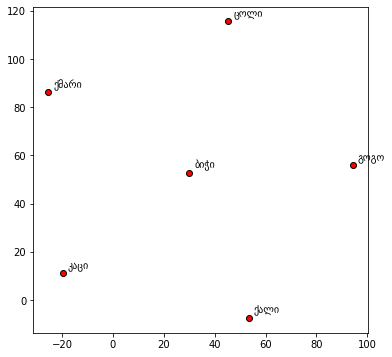

In [5]:
display(model,['კაცი','ქალი','ქმარი','ცოლი','ბიჭი','გოგო'])

In [6]:
most_similar(model,'საქართველო')

[('რუსეთი', 0.7153475284576416),
 ('ქვეყანა', 0.7017509341239929),
 ('ევროპა', 0.6886364817619324),
 ('საქართველოც', 0.6679713129997253),
 ('სომხეთი', 0.6543735861778259)]

In [7]:
analogy(model,'დილა','8','24')

'საღამო'

In [11]:
analogy(model,'სამი','ორი','ოთხი')

'ხუთი'

In [12]:
analogy(model,'სამი','ორი','ხუთი')

'ექვსი'

In [15]:
analogy(model,'საფრანგეთი','პარიზი','ამსტერდამი')

'ჰოლანდია'

In [20]:
analogy(model,'შოთა','კაცი','ქალი')

'ლია'

In [21]:
analogy(model,'ოთარი','კაცი','ქალი')

'მაიკო'

In [22]:
analogy(model,'ოთო','კაცი','ქალი')

'ლიკა'